### Цели и описание проекта

**Описание проекта**:  
В данном проекте рассматривается задача оценки прибыльности добычи нефти в различных регионах с использованием данных о запасах нефти в скважинах. Основной задачей является необходимость выбора региона с наибольшей потенциальной прибыльностью, при этом учитывая риски, связанные с возможными отклонениями в предсказаниях запасов нефти. Решение этой задачи требует применения методов анализа данных и машинного обучения для прогнозирования и оценки финансовых показателей.

**Задача** — разработать модель, которая прогнозирует запасы нефти в скважинах, а также оценить прибыльность в разных регионах, принимая во внимание риски и возможности выхода на безубыточность.

**Цель исследования**:  
Цель исследования — создать модель прогнозирования, которая предскажет объем добычи нефти и на основе этих прогнозов вычислит прибыль в разных регионах. Также важно оценить риски и выбрать наиболее прибыльные регионы с минимальными шансами на убытки.

**Ход исследования**:

1. **Загрузка данных**:  
   Для анализа использовались данные о запасах нефти, количестве скважин и других экономических показателях для трех разных регионов. Данные содержат информацию о запасах нефти, ценах на нефть, а также показатели скважин.

2. **Предобработка данных**:  
   В процессе предобработки были исследованы дубликаты, проверены пропуски и типы данных.

3. **Исследовательский анализ данных**:  
   На этом этапе был проведен анализ распределений признаков, таких как объемы нефти в скважинах, а также оценка выбросов и аномальных значений. Также был выполнен корреляционный анализ для оценки взаимосвязей между различными признаками.

4. **Моделирование и прогнозирование**:  
   С использованием методов машинного обучения была построена модель линейной регрессии прогнозирования запасов нефти в скважинах. Для оценки точности прогнозов использовалась метрика RMSE.

5. **Оценка прибыльности и риска**:  
   Для оценки прибыльности был проведен расчет доходов и рисков на основе прогнозируемых запасов нефти. Включение метода бустрапа позволило определить доверительные интервалы и вероятность получения прибыли. Риски были рассчитаны как доля случаев, когда прибыль оказывалась отрицательной.

6. **Выбор оптимального региона для инвестиций**:  
   На основе расчетов прибыли и риска были выбраны регионы с наибольшей средней прибылью при допустимом уровне риска. Таким образом, был выбран регион №2 как наиболее подходящий для инвестиций.

**Выводы**:  
- Для каждого региона был выполнен анализ прибыли, который показал, что все регионы имеют шанс выйти на безубыточность.
- Прогнозы запасов нефти и расчеты прибыли показали, что регион №2 является наилучшим для инвестиций, поскольку его прибыльность выше, а риск не превышает допустимого уровня.
- В ходе исследования были использованы различные методы анализа данных, включая исследовательский анализ, моделирование и расчет прибыли с учетом рисков, что позволило принять обоснованное решение о выборе региона для дальнейших инвестиций.

### Загрузка и предобработка данных

In [ ]:
!pip install phik sweetviz seaborn matplotlib -q
# !pip install ydata-profiling -q
# !pip install numpy==1.22.0 -q

In [ ]:
import pandas as pd
import sweetviz as sv

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats as st
# from ydata_profiling import ProfileReport

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [ ]:
df_geo0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv', index_col='id')
df_geo0.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df_geo1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv', index_col='id')
df_geo1.head()

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df_geo2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv', index_col='id')
df_geo2.head()

,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
df_geo0.shape, df_geo1.shape, df_geo2.shape

((100000, 4), (100000, 4), (100000, 4))

In [ ]:
df_geo0.info(), df_geo1.info(), df_geo2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1  

(None, None, None)

Изменений типов не требуется, пропусков нет

In [ ]:
df_geo0.duplicated().sum(), df_geo1.duplicated().sum(), df_geo2.duplicated().sum()

(0, 0, 0)

#### Вывод по разделу "Загрузка и предобработка данных"
- Данные успешно загружены с индексом по столбцу `id`.
- Типы данных соответствуют ожидаемым и не требуют изменений.
- Пропущенные значения в данных отсутствуют.
- Дубликатов строк не обнаружено.

### Исследовательский анализ данных

                                             |          | [  0%]   00:00 -> (? left)


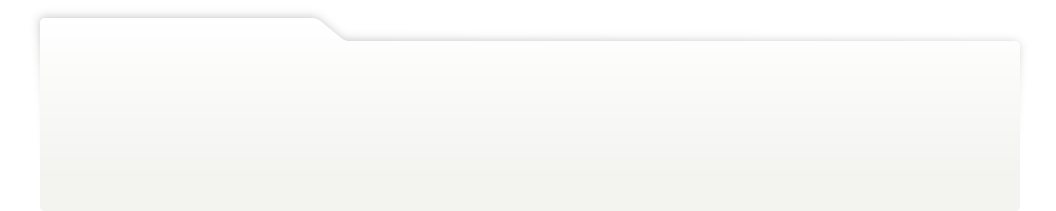
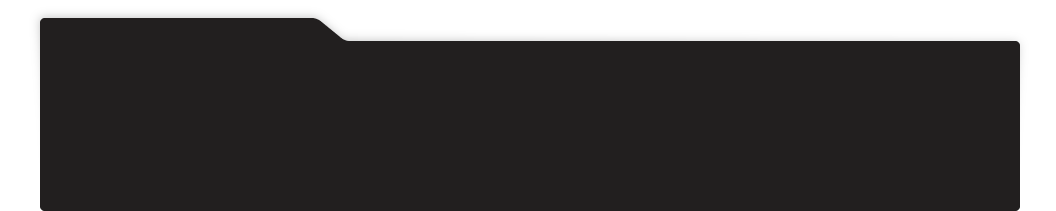
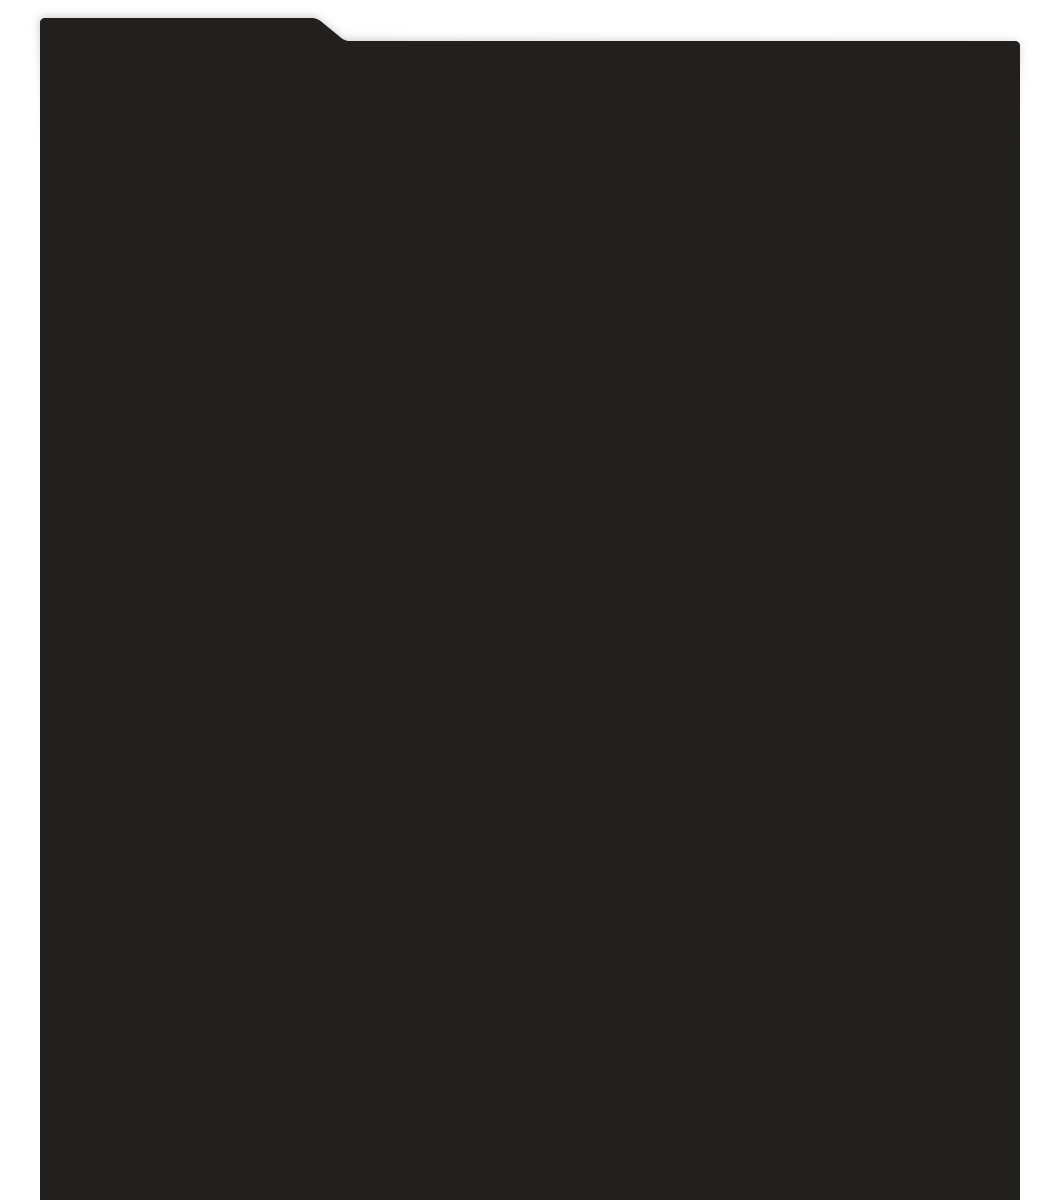
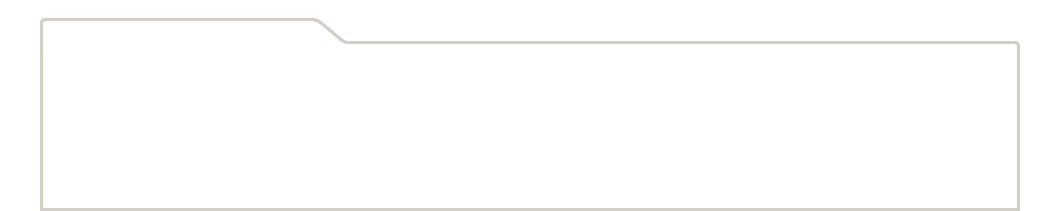
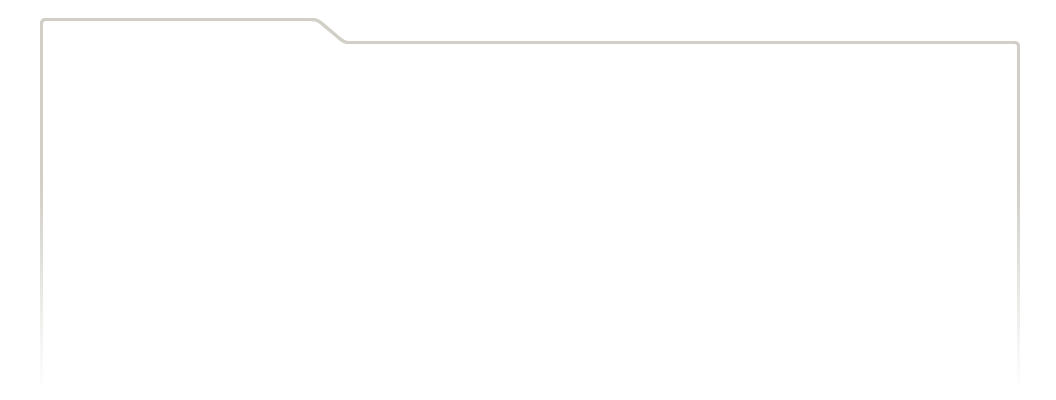
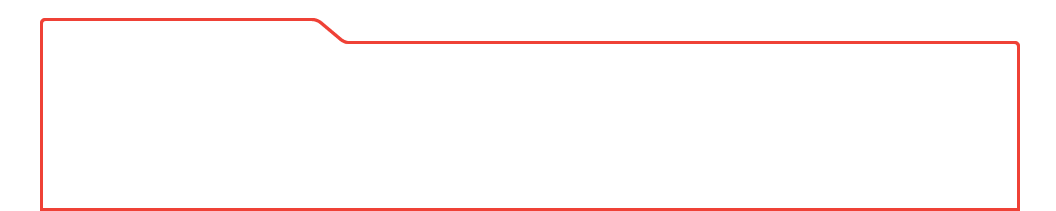
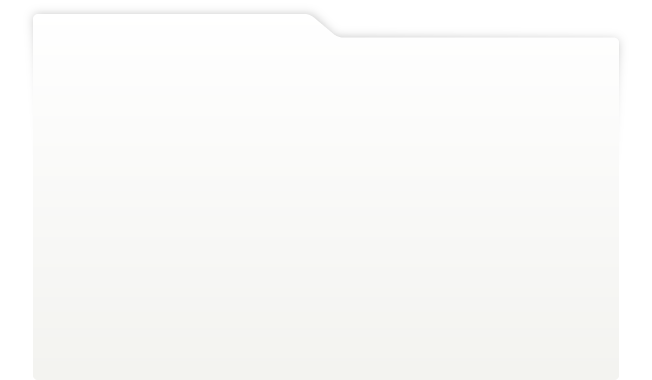
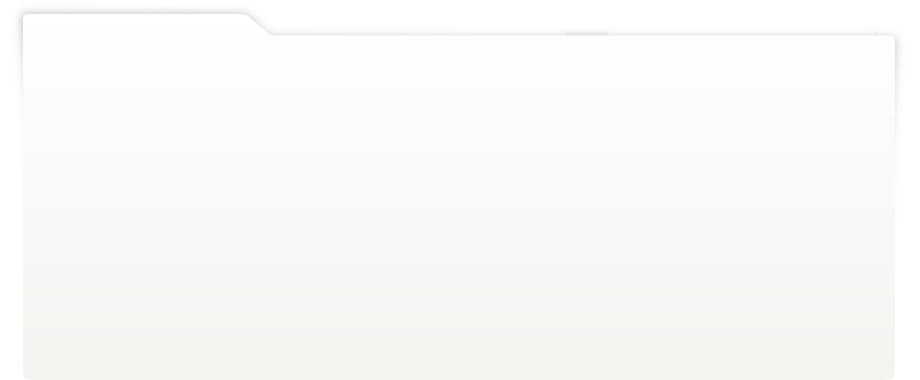
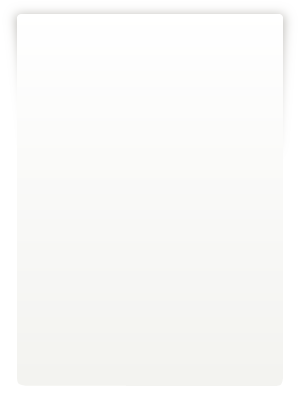
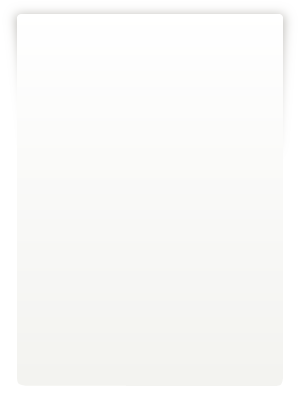
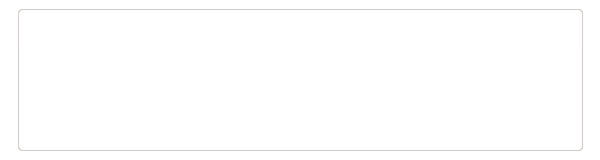
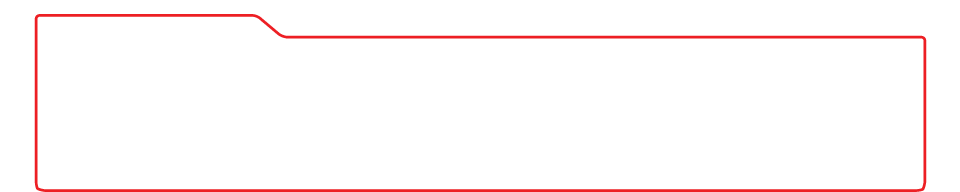
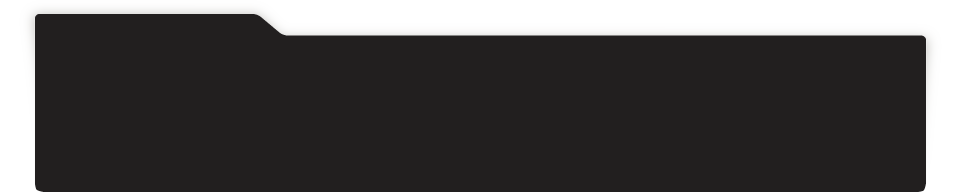
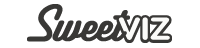
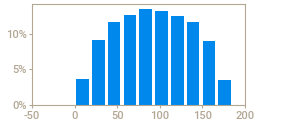
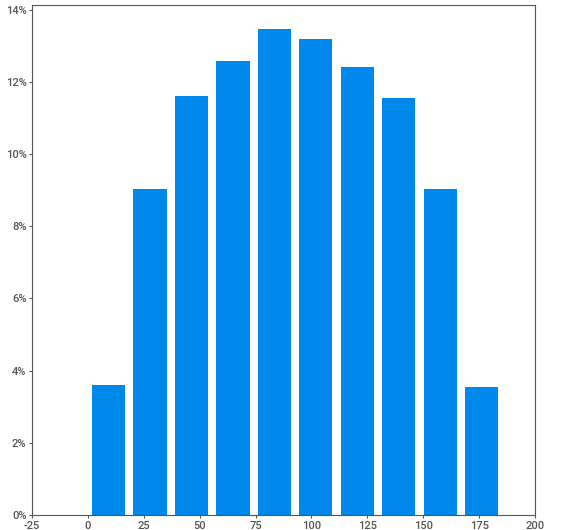
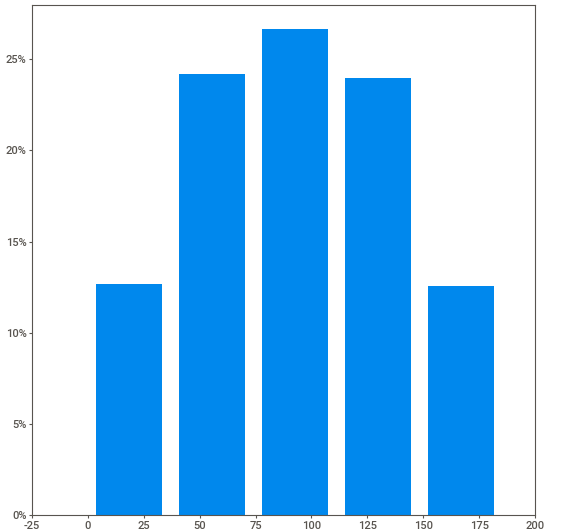
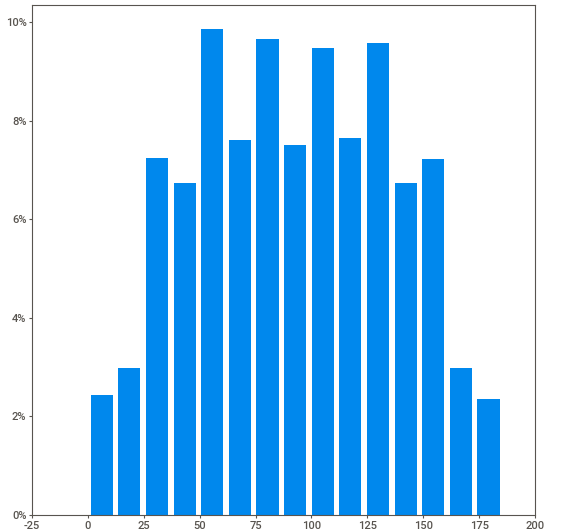
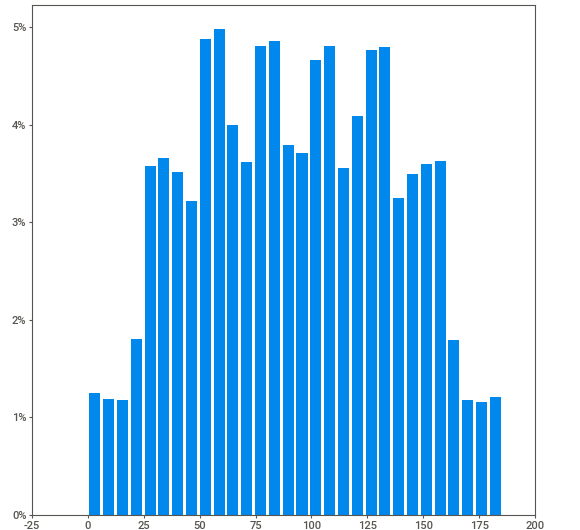
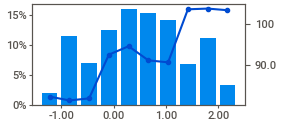
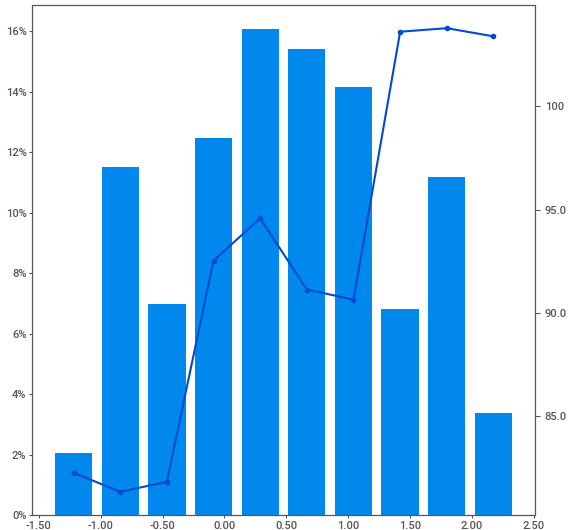
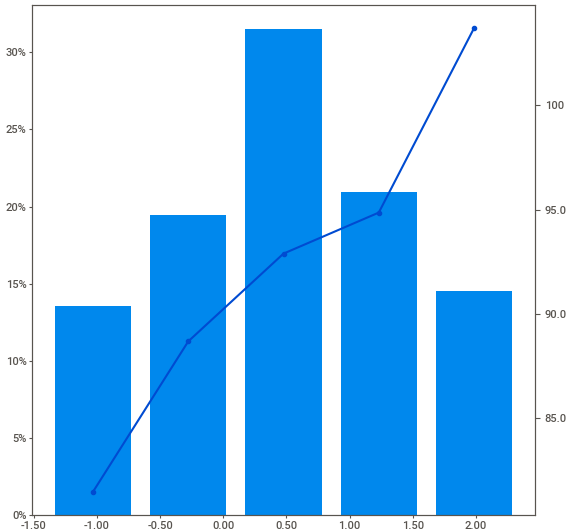
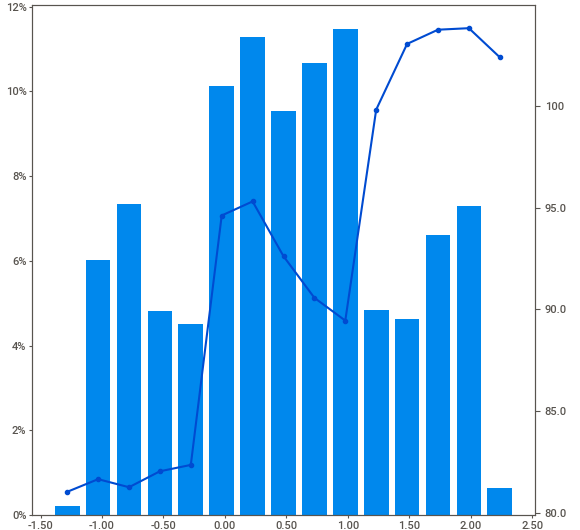
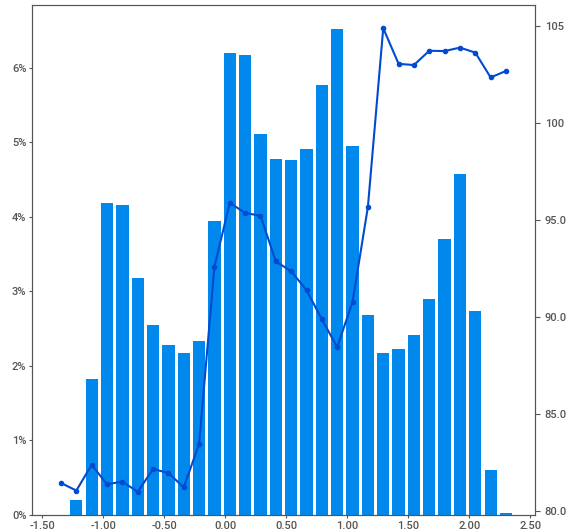
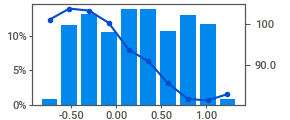
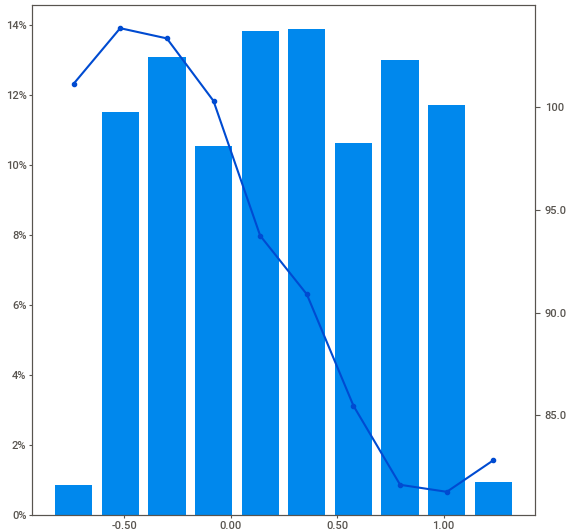
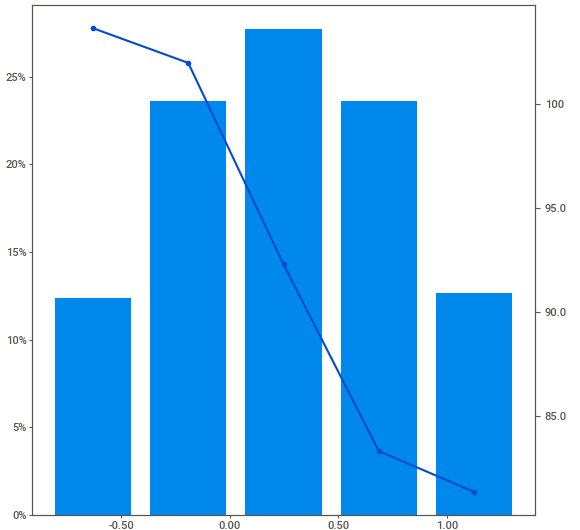
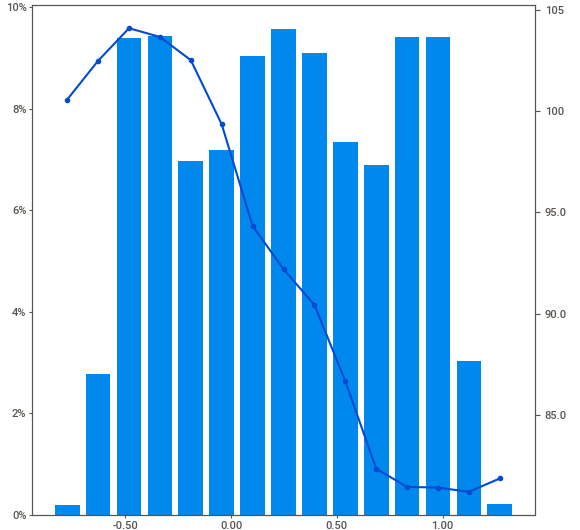
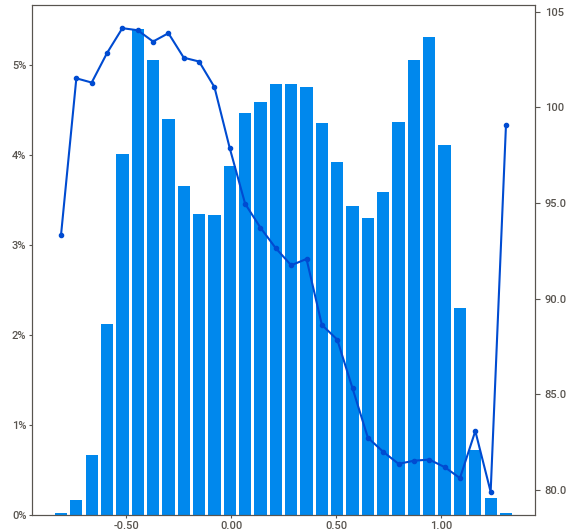
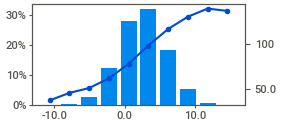
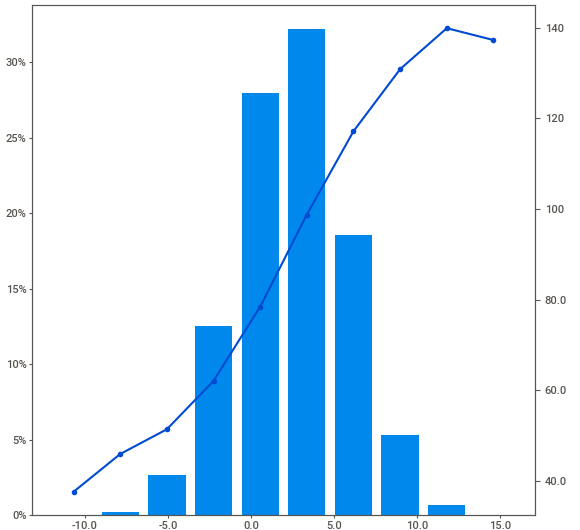
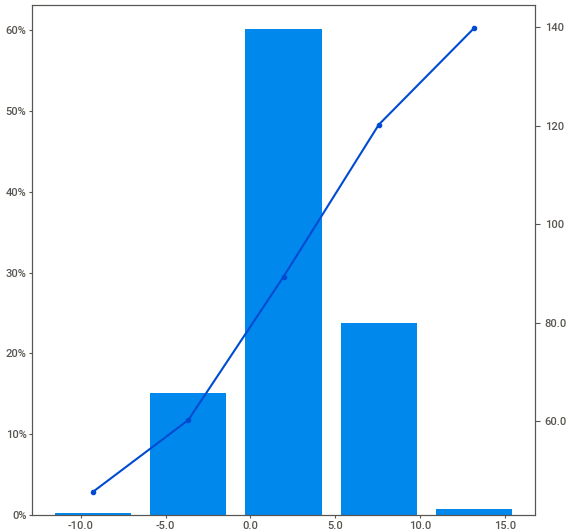
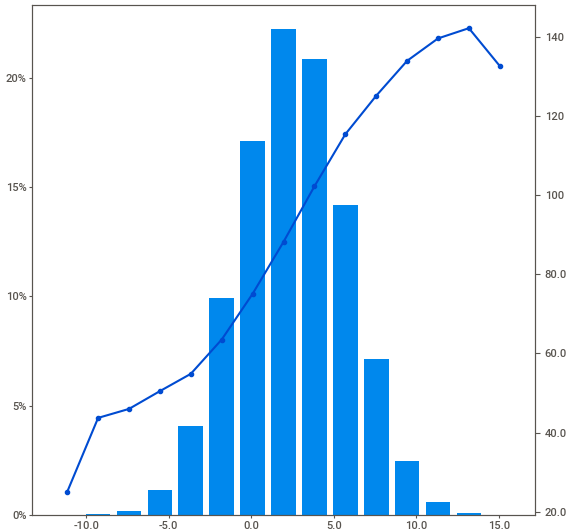
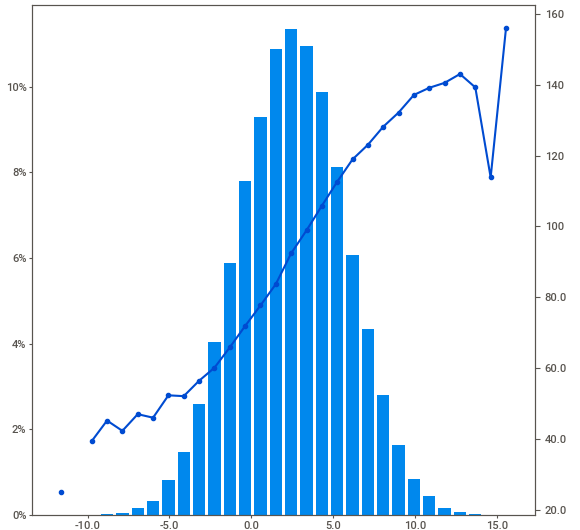
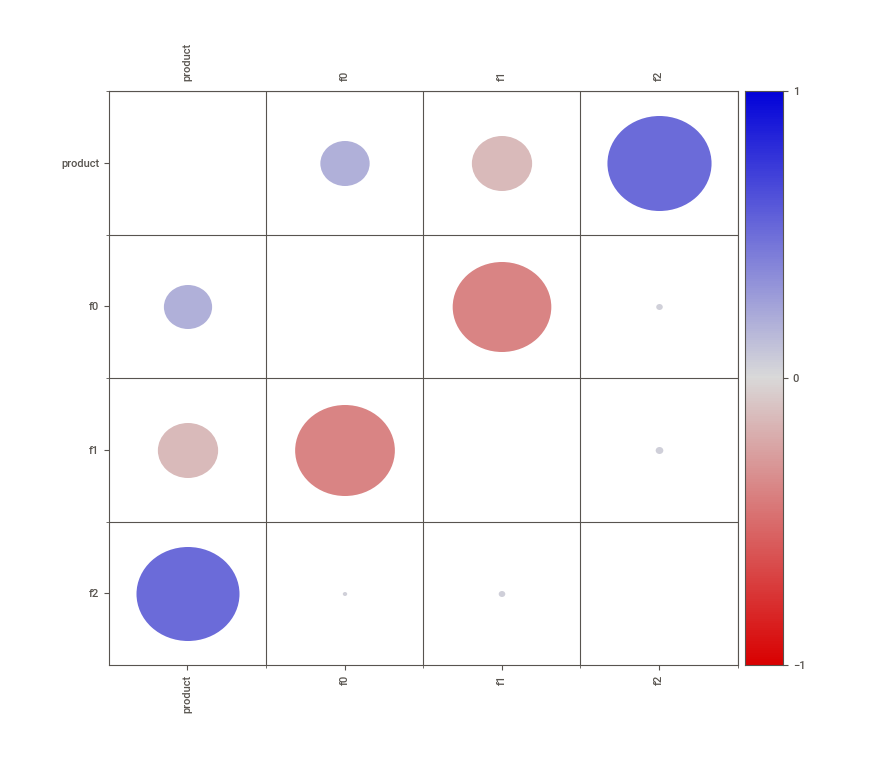
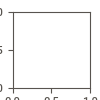

In [ ]:
dfs = {
    'region_1': df_geo0,
    'region_2': df_geo1,
    'region_3': df_geo2
}

report = sv.analyze(df_geo0, target_feat='product')
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


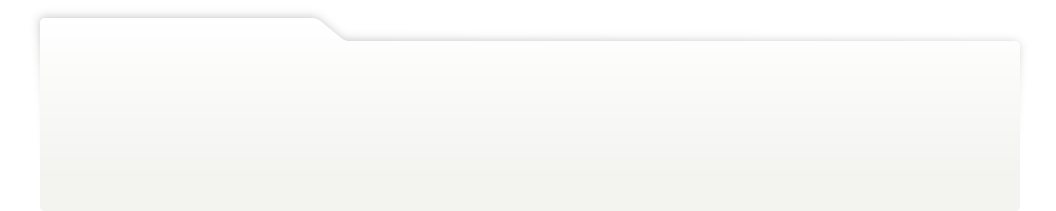
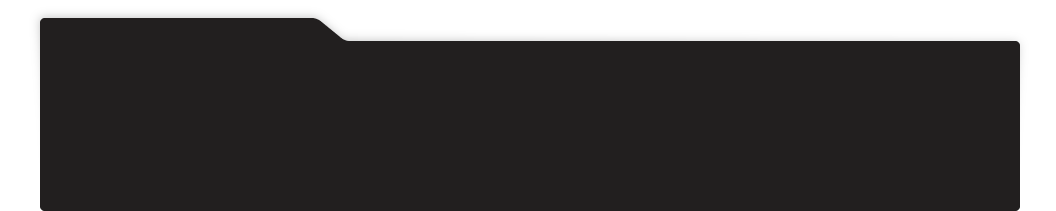
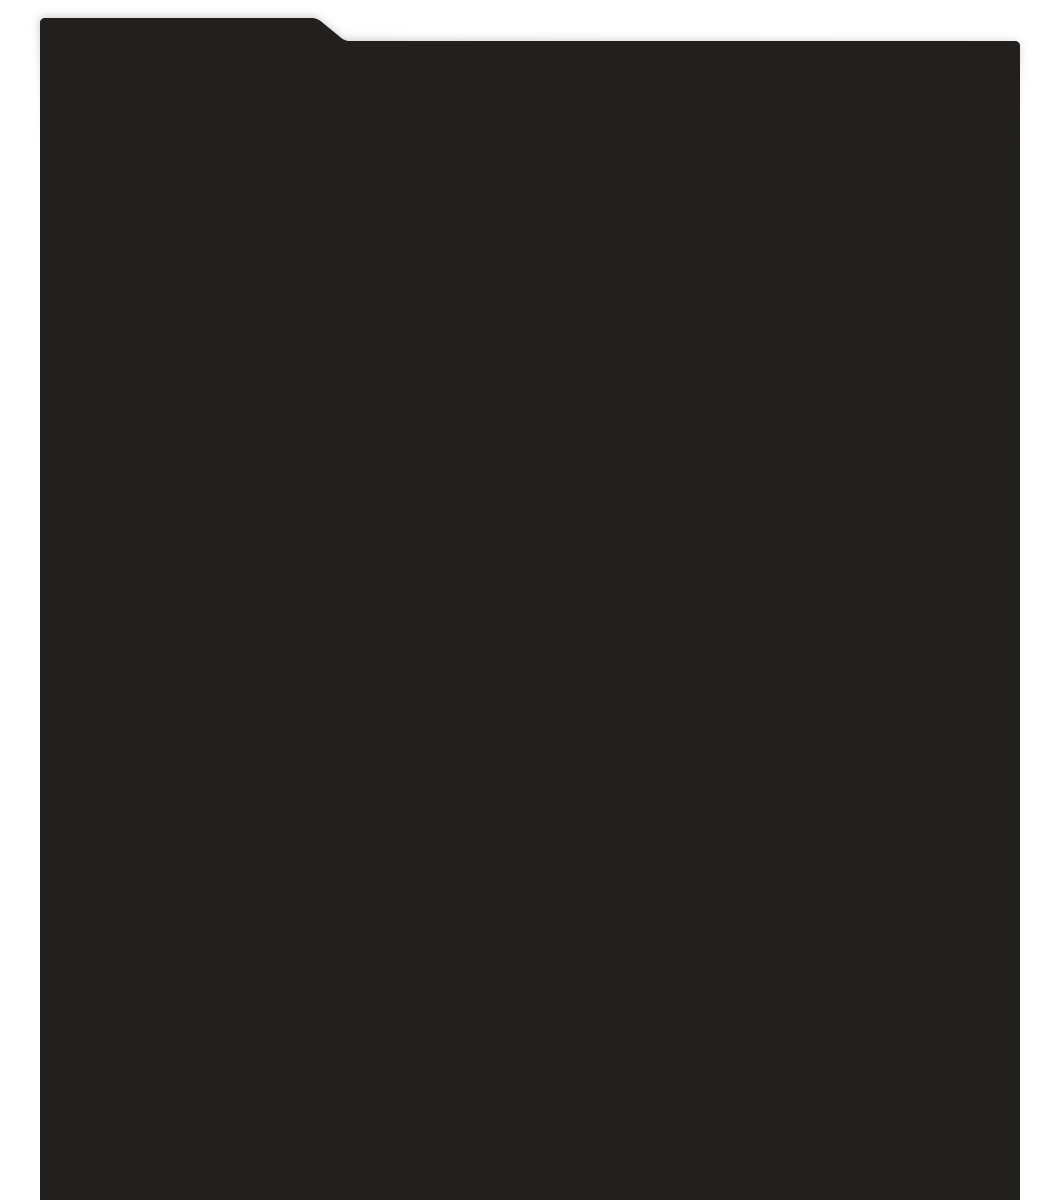
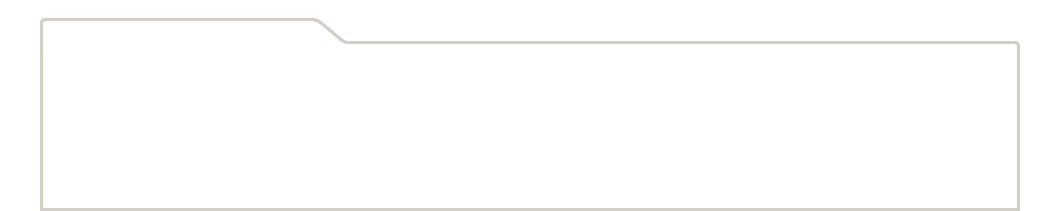
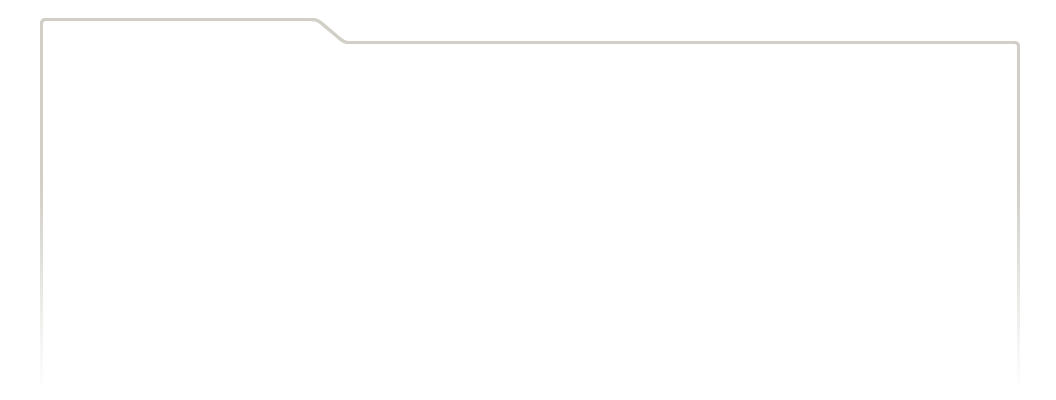
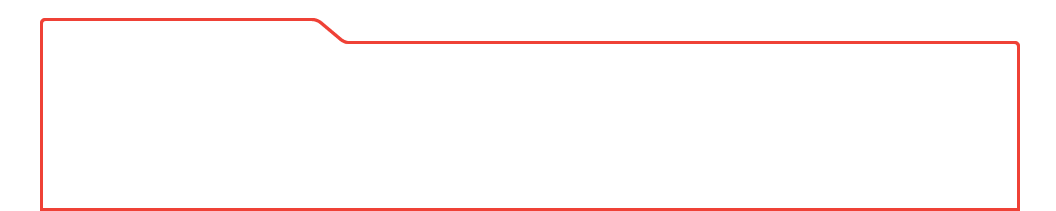
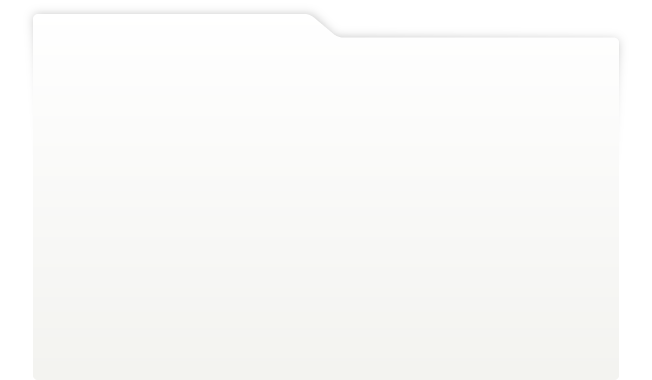
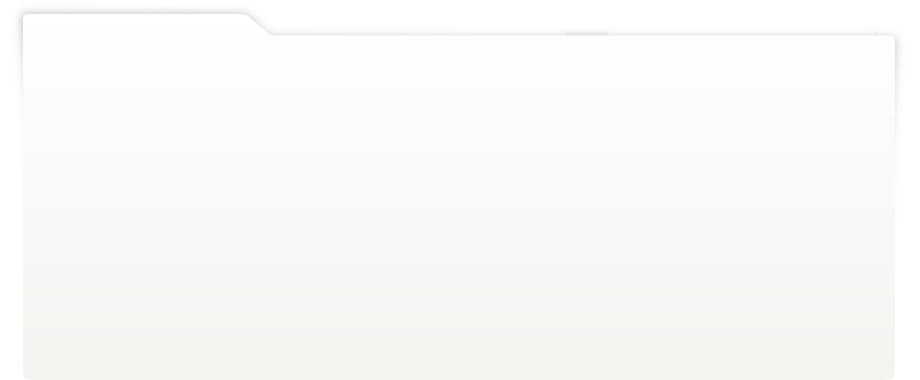
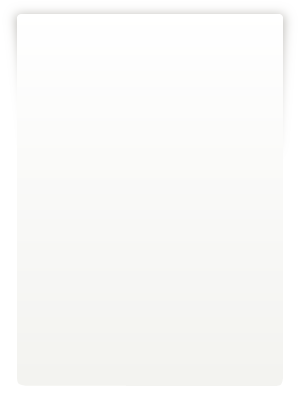
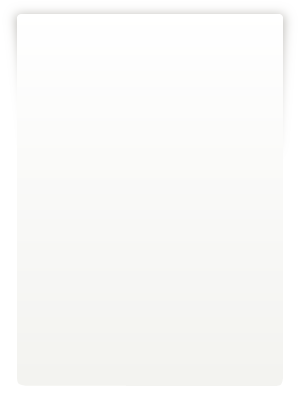
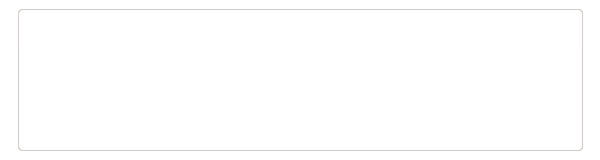
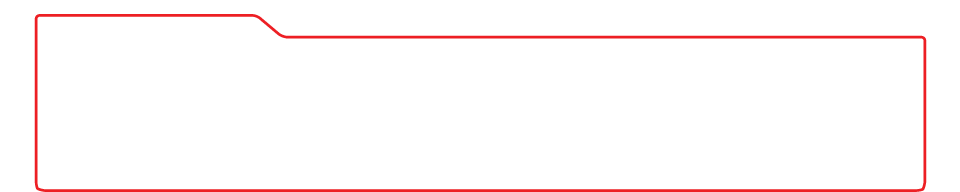
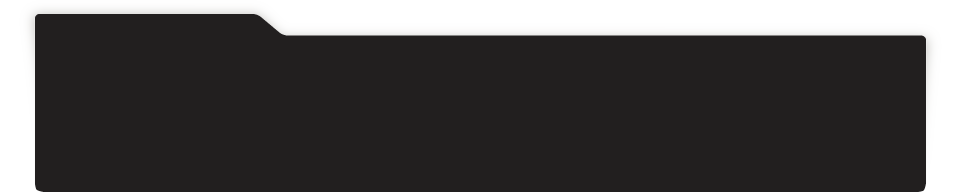
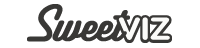
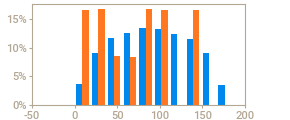
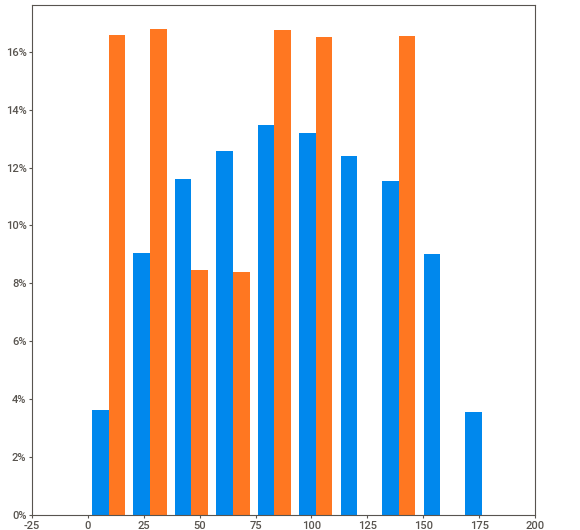
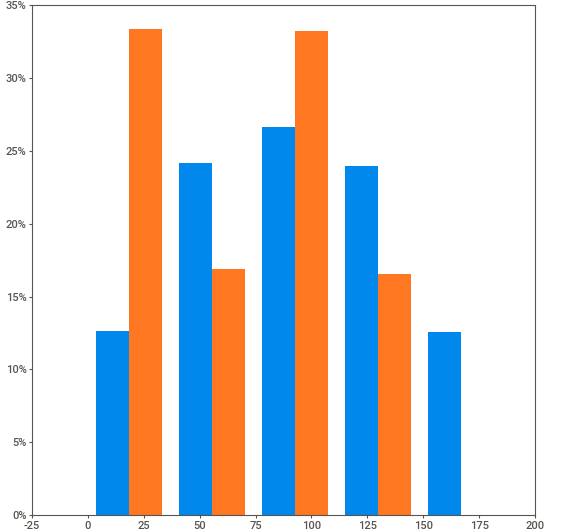
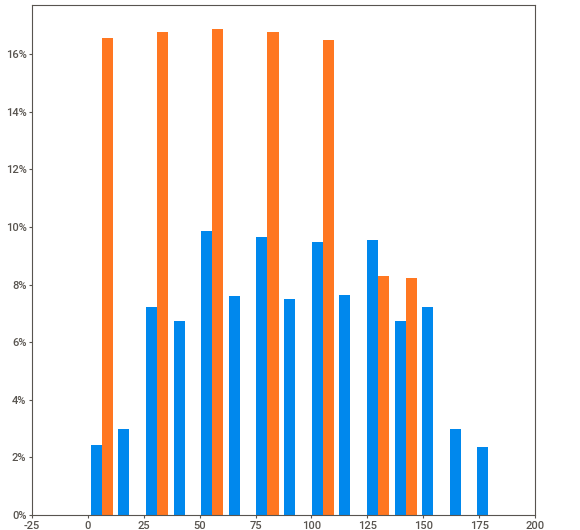
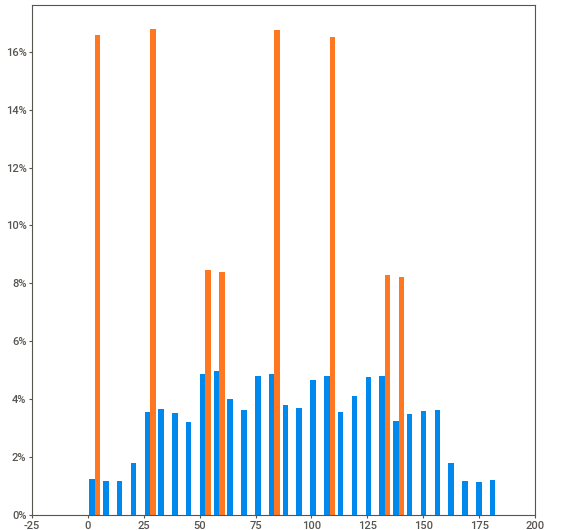
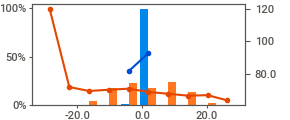
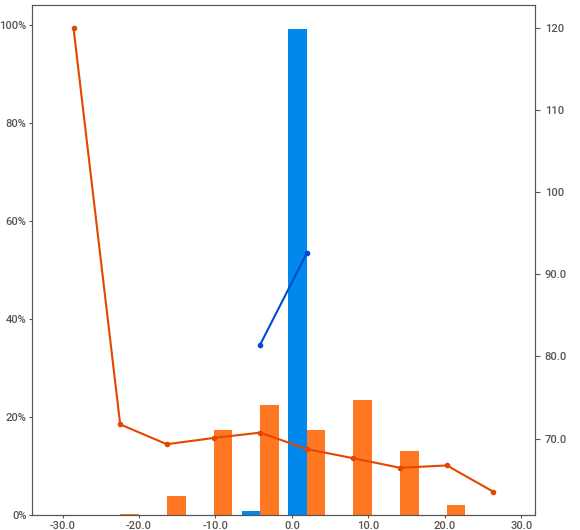
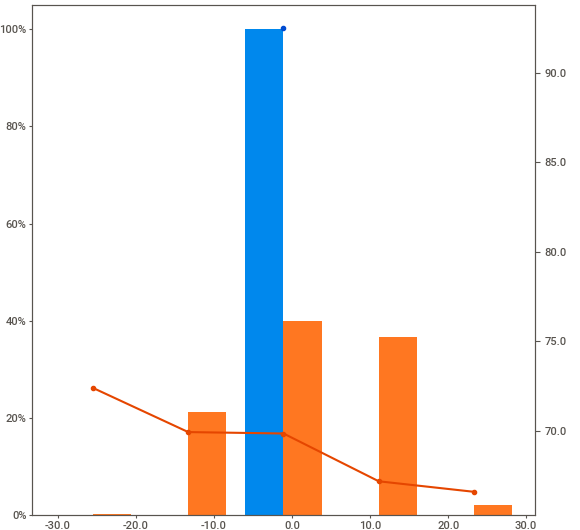
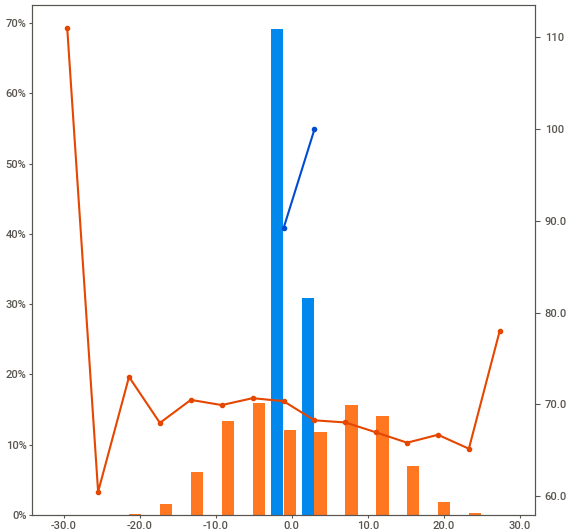
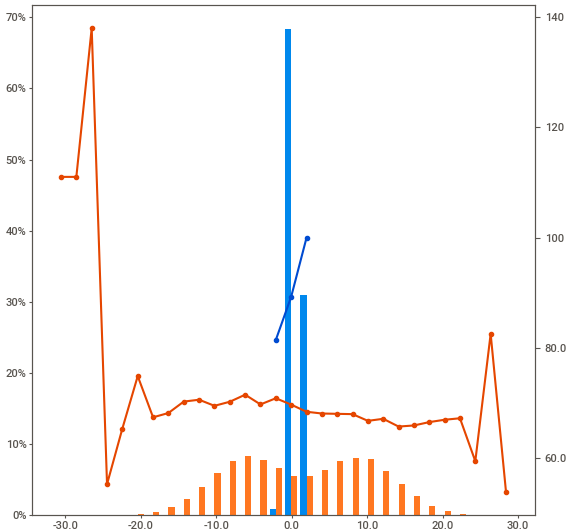
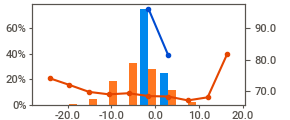
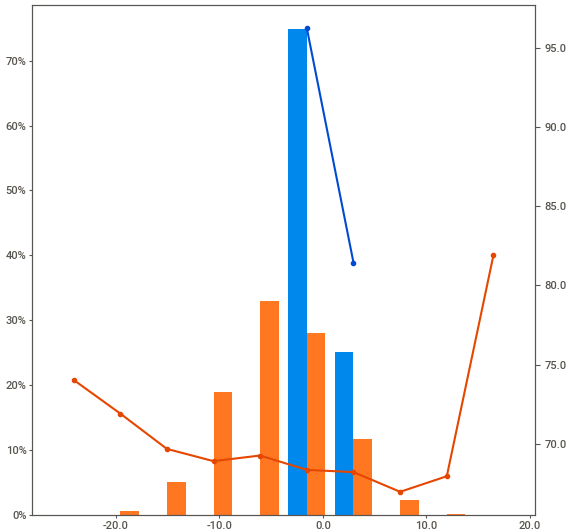
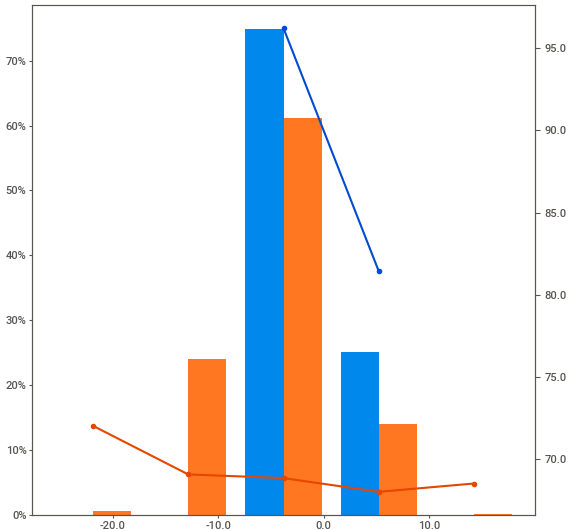
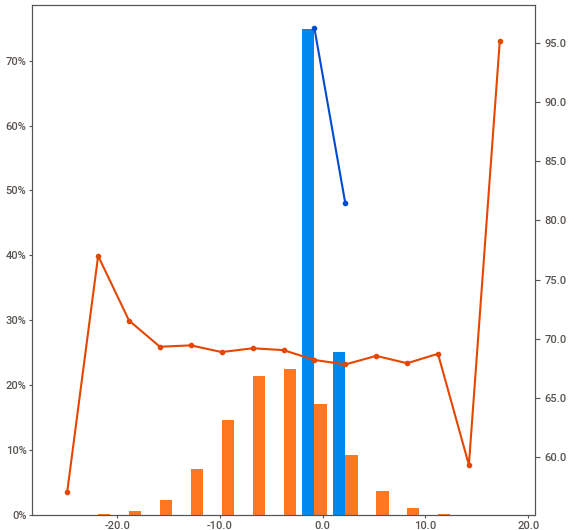
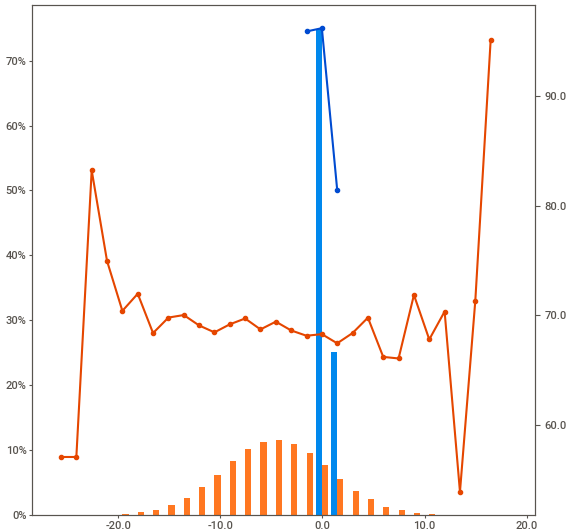
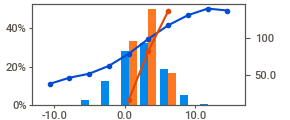
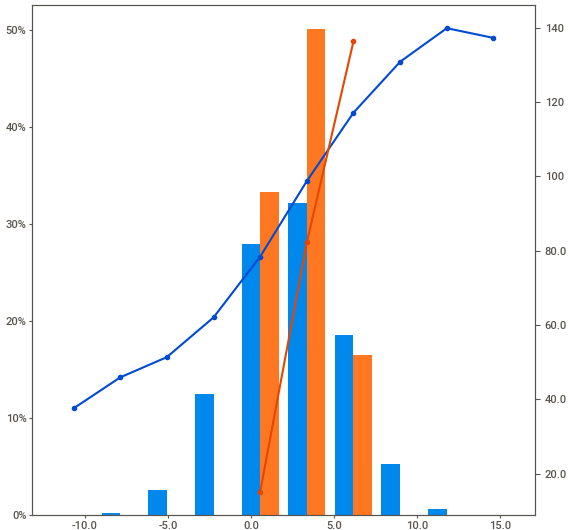
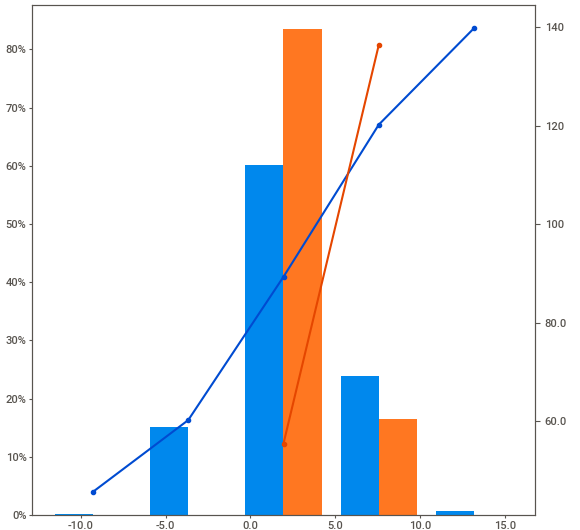
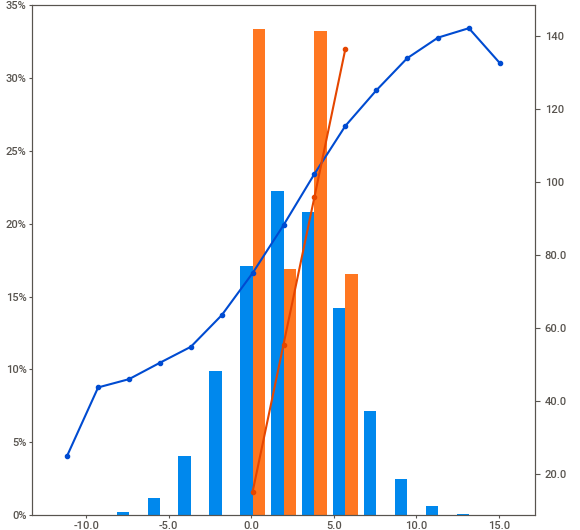
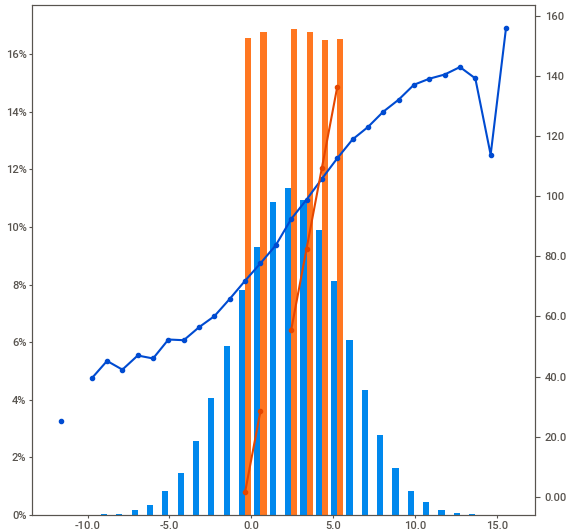
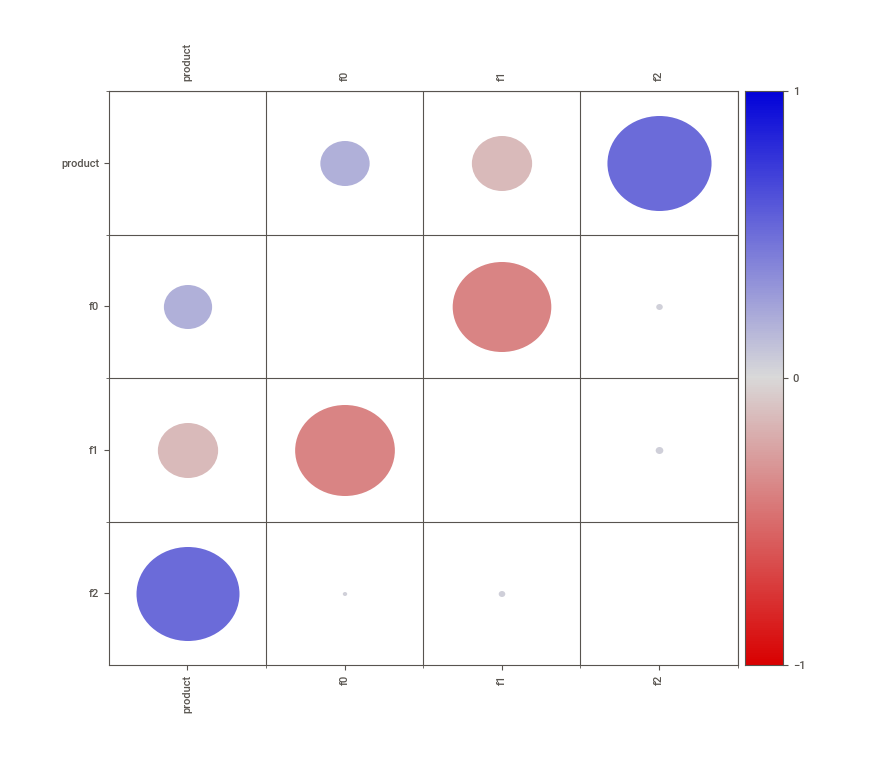
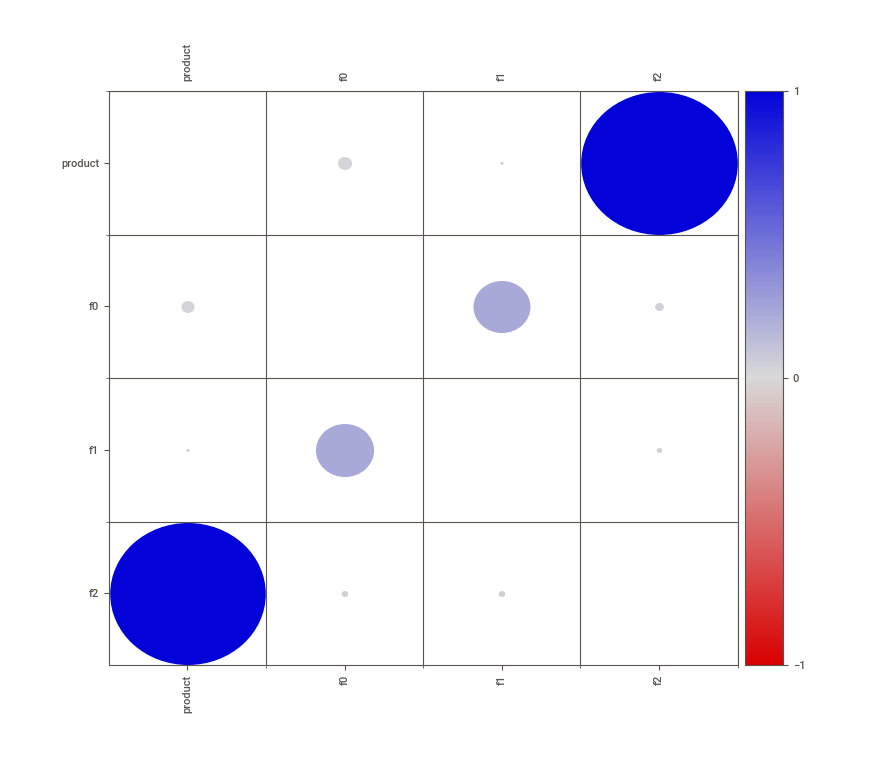

In [ ]:
report = sv.compare([df_geo0, "geo0"], [df_geo1, "geo1"], 'product')
report.show_notebook()

In [ ]:
df_geo0.describe(), df_geo1.describe(), df_geo2.describe()

(                  f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        0.500419       0.250143       2.502647      92.500000
 std         0.871832       0.504433       3.248248      44.288691
 min        -1.408605      -0.848218     -12.088328       0.000000
 25%        -0.072580      -0.200881       0.287748      56.497507
 50%         0.502360       0.250252       2.515969      91.849972
 75%         1.073581       0.700646       4.715088     128.564089
 max         2.362331       1.343769      16.003790     185.364347,
                   f0             f1             f2        product
 count  100000.000000  100000.000000  100000.000000  100000.000000
 mean        1.141296      -4.796579       2.494541      68.825000
 std         8.965932       5.119872       1.703572      45.944423
 min       -31.609576     -26.358598      -0.018144       0.000000
 25%        -6.298551      -8.267985       1.000021      26.9

region_1


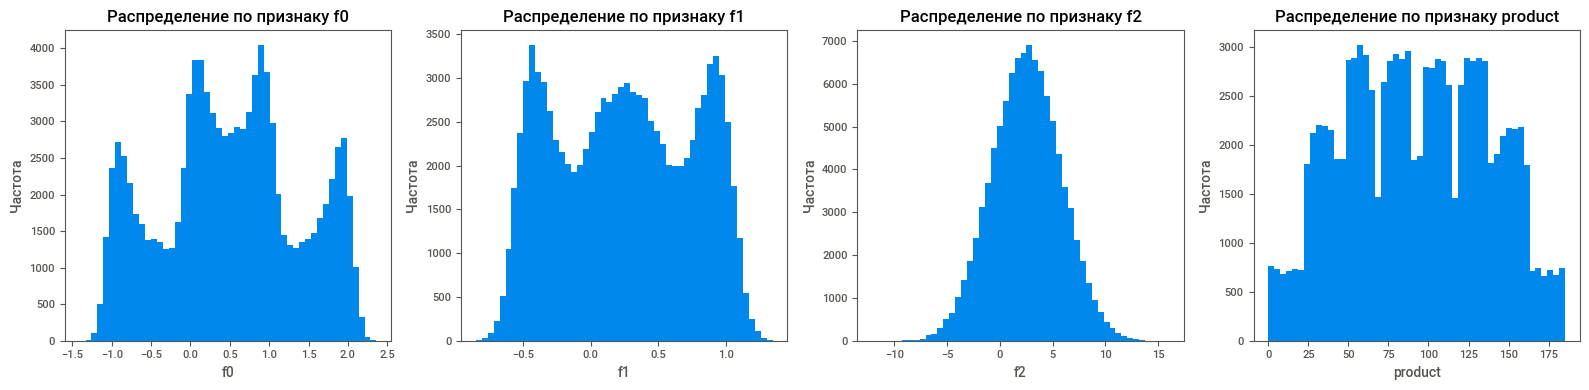

region_2


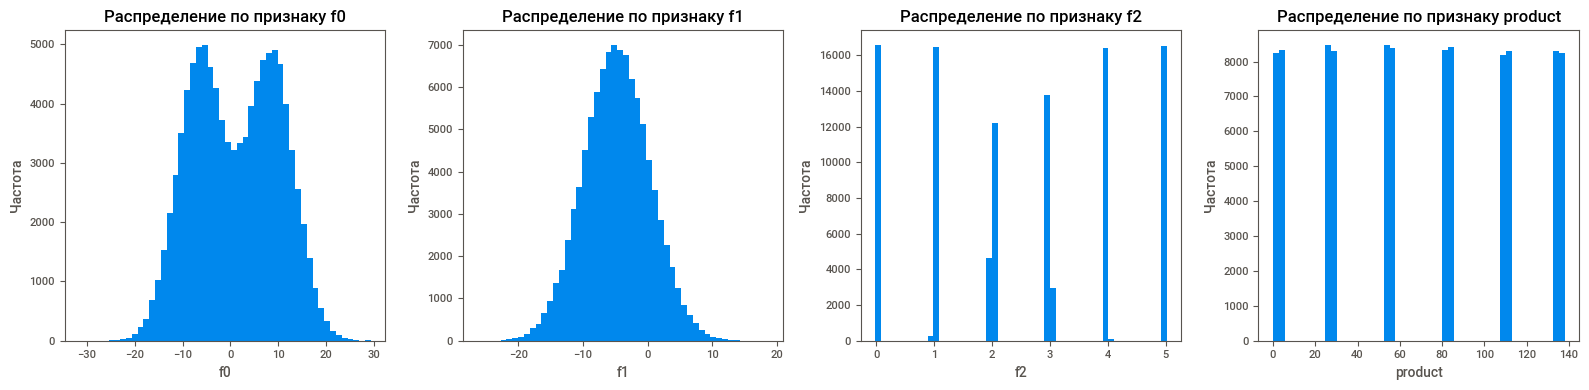

region_3


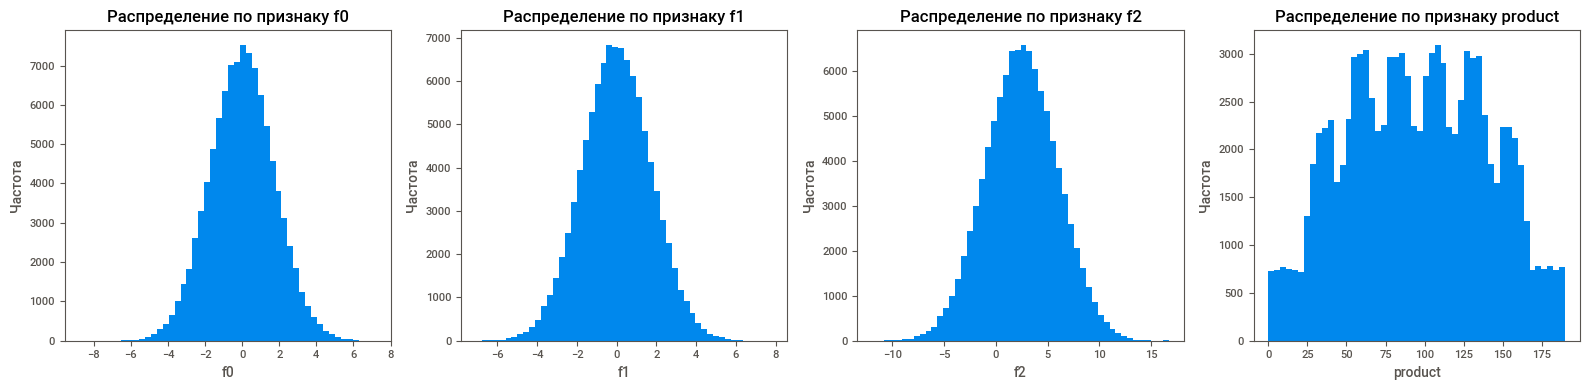

In [ ]:
def show_hist(data, num_columns=None):
    if num_columns is None:
        num_columns = data.select_dtypes(include=['int', 'float']).columns

    plt.figure(figsize=(4 * len(num_columns), 4))

    for i, column in enumerate(num_columns):
        plt.subplot(1, len(num_columns), i + 1)
        data[column].plot(kind='hist', bins=50)
        plt.title('Распределение по признаку '+ column)
        plt.xlabel(column)
        plt.ylabel('Частота')


    plt.tight_layout()
    plt.show()

for name, df in dfs.items():
    print(name)
    show_hist(df)

region_1


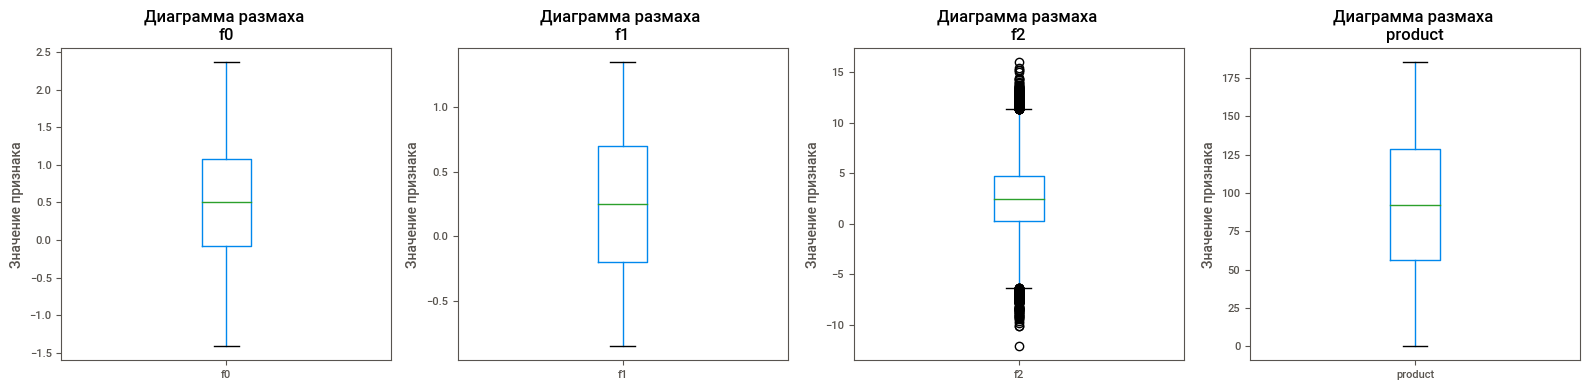

region_2


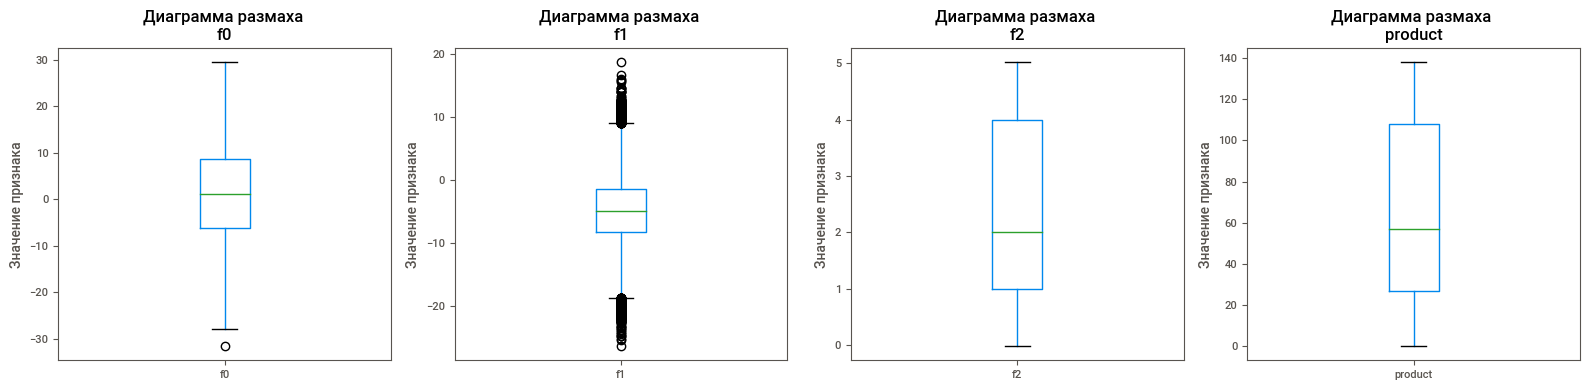

region_3


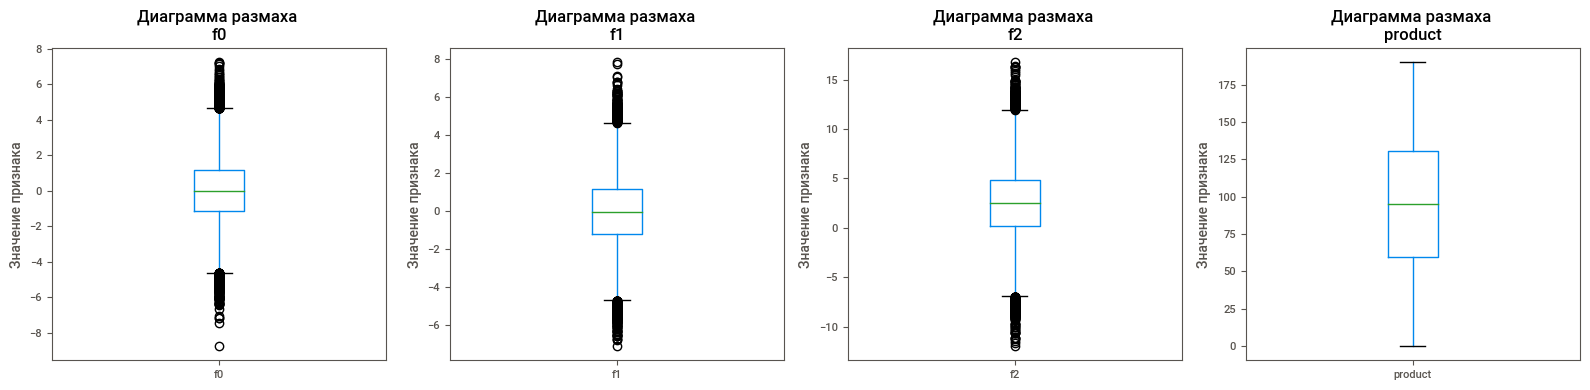

In [ ]:
def show_box(data, num_columns=None):
    if num_columns is None:
        num_columns = data.select_dtypes(include=['int', 'float']).columns

    plt.figure(figsize=(4 * len(num_columns), 4))

    for i, column in enumerate(num_columns):
        plt.subplot(1, len(num_columns), i + 1)
        data[column].plot(kind='box')
        plt.title('Диаграмма размаха \n' + column)
        plt.ylabel('Значение признака')

    plt.tight_layout()
    plt.show()

for name, df in dfs.items():
    print(name)
    show_box(df)

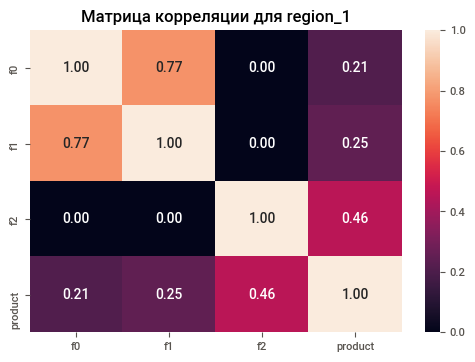

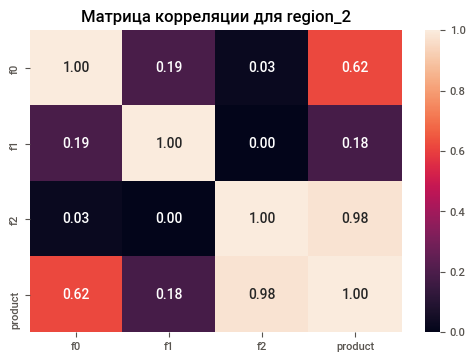

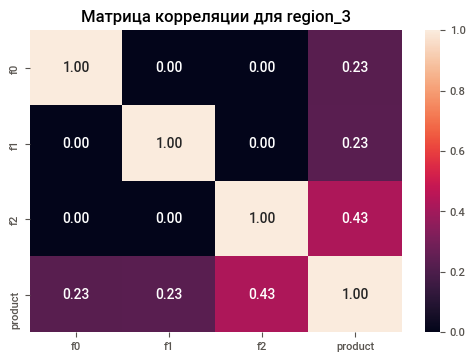

In [ ]:
num_columns = ['f0', 'f1', 'f2', 'product']
for name, df in dfs.items():
    sns.heatmap(df.phik_matrix(interval_cols=num_columns, bins=20), annot=True, fmt='.2f');
    plt.title('Матрица корреляции для ' + name)
    plt.show()



#### Выводы по разделу "Исследовательский анализ данных":

- Запасы нефти в скважинах варьируются в диапазоне от 0 до 190 тыс. баррелей.
- Некоторые признаки имеют нормальное распределение с несколькими пиками (2-3 вершины).
- В регионе №2 признак `f2` и целевая переменная (`product`) распределены равномерно и разбиты по категориям.
- Признаки, имеющие нормальное распределение с одной вершиной, содержат выбросы.
- Аномальных значений в данных не выявлено.
- В регионе №2 целевая переменная (`product`) сильно коррелирует с признаком `f2`.
- Мультиколлинеарных признаков не обнаружено.

### Обучение модели

In [ ]:
def prepare_data(df, target):

    X = df.drop(columns=target)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        random_state=RANDOM_STATE,
        test_size=TEST_SIZE
    )

    num_col_names = X_train.select_dtypes(include='number').columns.tolist()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return  y_test, y_pred

In [ ]:
target = 'product'
predicts = {}
for name, df in dfs.items():
    y_test, y_pred = prepare_data(df, target)
    predicts[name] = y_test, y_pred
    print(name)
    print('perdicted_product_mean = ', y_pred.mean())
    print('RMSE = ', mean_squared_error(y_test, y_pred, squared=False), '\n')


region_1
perdicted_product_mean =  92.39879990657768
RMSE =  37.75660035026169 

region_2
perdicted_product_mean =  68.7128780391376
RMSE =  0.8902801001028846 

region_3
perdicted_product_mean =  94.77102387765939
RMSE =  40.145872311342174 



#### Выводы по разделу Обучение модели
- Для каждого региона обучена модель линейной регрессии на 75% выборки и получено предсказание на 25% выборки
- В регионе №2 низкий средний запас нефти на скважину, чем в первом или во втором, но при этом и разброс  значений в регионе №2  значительно ниже.

### Расчет прибыли

In [ ]:
BUDGET = 10_000_000_000
WELLS_COUNT = 500
BEST_WELLS_COUNT = 200
BARREL_PRICE = 450

round(BUDGET / (BEST_WELLS_COUNT * BARREL_PRICE), 2)

111111.11

- чтобы выйти не безубыточность в каждом регионе 200 лучших скважин должны в среднем дать доход больше 111 111 рублей на скважину.
- в первом и в третьем регионе средний запас на скважину больше, но  RMSE также значительно больше в отличие от второго региона. Все регионы имеют шанс выйти на безубыточность

In [ ]:
def profit_calc(df_product, count):

    df_product = df_product.sort_values(by='y_pred' ,ascending=False)[:count]
    revenue =  BARREL_PRICE * df_product['y_test'].sum() * 1000
    return revenue

region_1
profit mean = 406,278,783.42
profit interval = (-117,742,136.49, 911,737,050.75)
risk = 6.70%



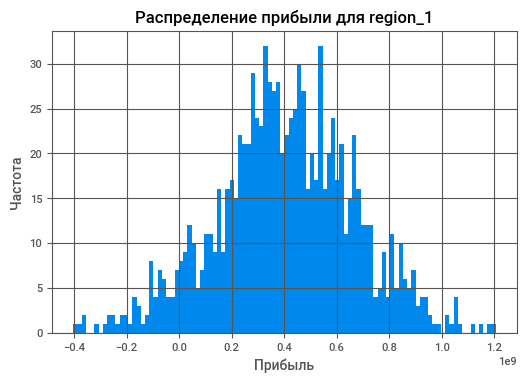

region_2
profit mean = 441,504,277.59
profit interval = (35,728,489.28, 828,006,639.00)
risk = 1.60%



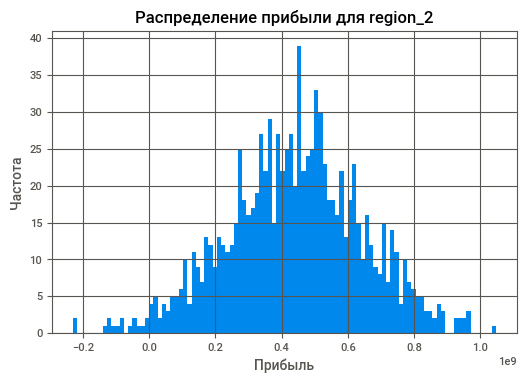

region_3
profit mean = 385,213,195.91
profit interval = (-164,785,166.11, 888,206,234.20)
risk = 7.80%



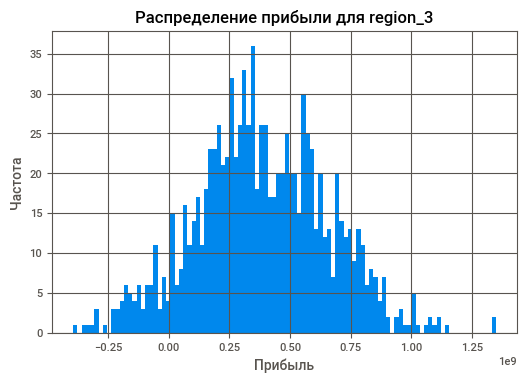

In [ ]:
state = np.random.RandomState(12345)

for name, (y_test, y_pred) in predicts.items():

    profits = []
    data = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

    for _ in range(1000):
        wells_subsample = data.sample(WELLS_COUNT, replace=True, random_state=state)
        profit = profit_calc(wells_subsample, BEST_WELLS_COUNT)
        profits.append(profit-BUDGET)

    profits = pd.Series(profits)

    print(name)
    print('profit mean =', f'{profits.mean():,.2f}')
    lower_bound = profits.quantile(0.025)
    upper_bound = profits.quantile(0.975)
    print('profit interval =', f'({lower_bound:,.2f}, {upper_bound:,.2f})')
    risk = profits[profits < 0].count() / len(profits)
    print('risk =', f'{risk:.2%}')
    print()


    profits.hist(bins=100)
    plt.title('Распределение прибыли для ' + name)
    plt.xlabel('Прибыль')
    plt.ylabel('Частота')
    plt.show()



####  Выводы по разделу "Расчет прибыли":

Для достижения безубыточности в каждом регионе 200 лучших скважин должны в среднем приносить доход свыше 111,111 рублей на скважину. В первом и третьем регионах средний запас на скважину больше, однако среднеквадратическая ошибка (RMSE) значительно выше по сравнению со вторым регионом, что указывает на большую неопределенность прогнозов в этих регионах.

Результаты бустрапа с 1000 повторениями показали следующие результаты:
- **Регион 1**: Средняя прибыль составляет 406,278,783.42 рублей, с доверительным интервалом от -117,742,136.49 до 911,737,050.75 рублей. Риск убытков составляет 6.70%.
- **Регион 2**: Средняя прибыль составляет 441,504,277.59 рублей, с доверительным интервалом от 35,728,489.28 до 828,006,639.00 рублей. Риск убытков — 1.60%.
- **Регион 3**: Средняя прибыль составляет 385,213,195.91 рублей, с доверительным интервалом от -164,785,166.11 до 888,206,234.20 рублей. Риск убытков равен 7.80%.

Все регионы имеют шанс выйти на безубыточность, но риск потерь различается между ними. На основании средней прибыли и приемлемого уровня риска, наилучший выбор — регион 2, так как он сочетает в себе приемлемый уровень риска с высокой средней прибылью.





###  Общий вывод:

Проект был направлен на оценку прибыльности и рисков для разных регионов нефтедобычи. Выявлено, что все три региона имеют потенциал выйти на безубыточность, однако риск потерь значительно различается. Применение метода бустрапа с 1000 повторениями показало, что вероятность убытков в первом и третьем регионах заметно выше, чем во втором регионе. Наилучшим выбором стал регион 2, который сочетает минимальные риски с высокой средней прибылью, делая его наиболее привлекательным для инвестиций.

